<a href="https://colab.research.google.com/github/LazyHooks/models_aon_comb/blob/main/app_int_tr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [51]:

from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


load data

In [53]:
dataset = pd.read_csv('New BP + Attr App Int_N.csv')

split

In [54]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

split

In [55]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

fit

In [56]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

print the model

In [57]:
print(model.feature_importances_)

[0.04947308 0.04459757 0.26133054 0.11836377 0.09765952 0.17574257
 0.         0.15095931 0.         0.10187362]


feature importance & weights

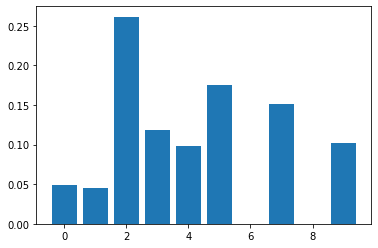

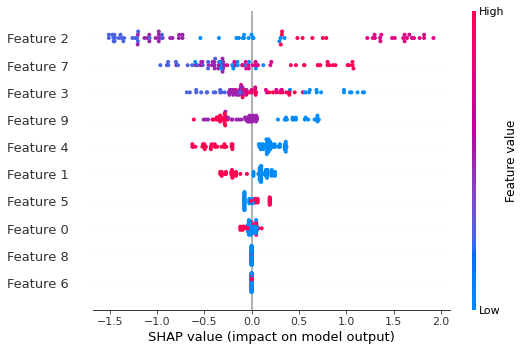

In [58]:
from matplotlib import pyplot
from xgboost import plot_importance
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)
#0-Junior
#1-mid
#2-Pay Positioning Score
#3-Pay Range Score	
#4-Internal focus
#5-Balanced	
#6-External	
#7-Pay Mix Score	
#8-Pay Differentiation Score	
#9-Pay Transparency


predict

In [59]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate predictions

In [60]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='binary')
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, average='binary')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(y_test, predictions, average='binary')
print('F-Measure: %.3f' % score)

Accuracy: 62.96%
Precision: 0.200
Recall: 0.500
F-Measure: 0.286


predict 1

In [61]:
#singlepred = model.predict([[]])
#singleprediction = [round(value) for value in y_pred]
#print(singleprediction)

visualise single

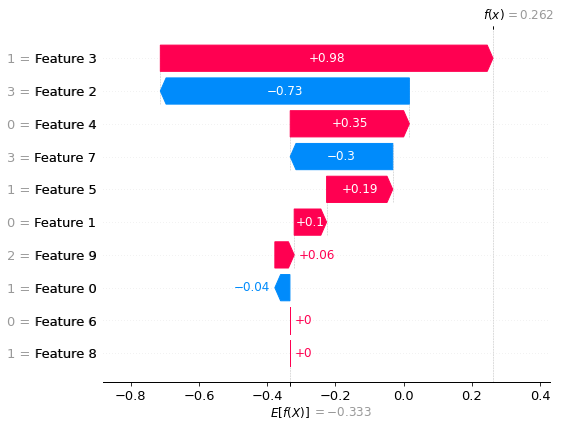

In [62]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])